### 数据清洗指删除、更正数据库中错误、不完整、格式有误或多余的数据。数据清理不仅能够更正错误，也可以加强来自各个单独信息系统不同数据间的一致性。

### 知识点
- 数据有效性判定依据
- 数据清洗常用方法
- 缺失值处理
- 重复值的处理
- IQR 值的计算

### 维度说明
- 有效性
    - Validity	数据的有效性源于统计学概念，即符合数据收集时所制定的规则及约束条件的数据。
- 精确度
    - Accuracy	精确度是衡量数据质量的另一个重要条件。
    - 一般情况下，通过数据清理很难改善数据的准确度，这就对数据源质量提出了较高的要求。
- 完整度
    - Completeness	如果在采集数据的过程中造成了数据丢失，也就影响了其完整程度。
    - 不完整的数据，势必会对分析结论造成影响，这需要进一步采取措施来改善这种情况。
- 一致性
    - Consistency	原始数据中，数据可能会存在不一致性。
    - 例如：客户在两个不同的系统中提供了两个不一样的家庭地址，而正确的地址只有一个。
    那么，就需要我们来判断并消除这种不一致性。
- 均匀度
    - Uniformity	数据的均匀度可能来源于度量单位的不一致，这就需要我们通过换算来解决，使得最终数据统一均匀。

## 步骤说明
- [1] 数据清理
    Data Cleansing	数据清理大致包括对空缺键值进行填充操作，
    对噪声数据进行相应的平滑处理，对孤立点和异常点进行删除处理等。
    ---
- [2]	数据集成
    Data Integration	将多个数据库或者数据文件里面包含的数据进行集成处理。
    ---
- [3]	数据转换
    Data Transformation	将数据进行聚集或者规范化处理，从一种形式转换成另外一种我们需要的形式。
    ---
- [4]	数据规约
    Data Reduction	对庞大的数据集进行压缩处理，且尽量保证最终预测结果的一致性。

    ![alt](https://doc.shiyanlou.com/document-uid214893labid7506timestamp1539841884152.png)

## 缺失值处理
缺失数据是数据清洗过程中常遇到的情况。数据缺失的原因多种多样，例如采集数据设备的损坏，造成某几天的数据缺失。或者是数据在传输、整理过程中造成的缺失。

对于缺失数据而言，通常都是需要处理的。在处理之前，我们先了解如何定位到缺失数据。
### 标记缺失数据
首先，我们生成一组包含缺失数据的示例数据。

In [59]:
import numpy as np
import pandas as pd
# Pandas 对于不同类型的空值有不一样的标注，对于数值型空值会使用 NaN（Not a Number）标识，对于字符串统一采样 None 标识。可以看到，上面的示例 DataFrame 中包含 5 个 NaN 值。
null_data = {'A': [10, np.nan, 25, np.nan, 42, np.nan],
             'B': [12, 15, np.nan, 14, 17, np.nan],
             'C': [10, 13, 27, 13, 19, 40]}

df = pd.DataFrame(null_data)
df

,A,B,C
0,10.0,12.0,10
1,NaN,15.0,13
2,25.0,NaN,27
3,NaN,14.0,13
4,42.0,17.0,19
5,NaN,NaN,40


In [60]:
df.isnull()  # True 为缺失值"

,A,B,C
0,False,False,False
1,True,False,False
2,False,True,False
3,True,False,False
4,False,False,False
5,True,True,False


In [61]:
df.isnull().sum()  # 统计每列缺失值数量

A    3
B    2
C    0
dtype: int64

### 删除缺失数据
- 缺失值处理最简单的方法就是「不处理，直接删除」，你可能觉得这句话是个「玩笑」，其实真的存在。对于直接删除缺失数据，主要存在于以下几种情形：

- 缺失数据占全部数据比例非常低，基本可以忽略不计，删除后且不会对整体数据分布产生影响。
缺失数据因为本身特性无法填充，比如对于某些检测指标，如果填充不准确会严重影响最终结果。这种情况下，宁愿删除也不要进行处理。
Pandas 删除缺失数据的操作主要是通过  dropna() 完成。

In [62]:
df.dropna()  # 删除全部存在缺失值的行
df.dropna(axis=1)  # 删除全部存在缺失值的列
df.dropna(how='all')  # 删除全部值均为缺失值的行
df.dropna(thresh=2)  # 删除行，且该行非缺失值少于 2 个

,A,B,C
0,10.0,12.0,10
1,NaN,15.0,13
2,25.0,NaN,27
3,NaN,14.0,13
4,42.0,17.0,19


#### 填充缺失值
除了直接删除缺失值这种「简单又暴力」的操作，还有一种经常使用到的方法是对缺失值进行填充。而填充一般分为 3 种情况：

- 固定值填充：人为指定，或使用行/列均值、中位数等。
- 临近值填充：使用缺失值相临近的数值填充。
- 数学填充：使用函数插值填充。

In [63]:
df.replace(np.nan, 0)  # 将缺失值填充为 0

,A,B,C
0,10.0,12.0,10
1,0.0,15.0,13
2,25.0,0.0,27
3,0.0,14.0,13
4,42.0,17.0,19
5,0.0,0.0,40


In [64]:
df.fillna(0)  # 将缺失值填充为 0

,A,B,C
0,10.0,12.0,10
1,0.0,15.0,13
2,25.0,0.0,27
3,0.0,14.0,13
4,42.0,17.0,19
5,0.0,0.0,40


In [65]:
df.fillna(df.mean())  # 使用各列平均值填充

,A,B,C
0,10.000000,12.0,10
1,25.666667,15.0,13
2,25.000000,14.5,27
3,25.666667,14.0,13
4,42.000000,17.0,19
5,25.666667,14.5,40


In [66]:
df.fillna(df.median())  # 使用各列中位数填充

,A,B,C
0,10.0,12.0,10
1,25.0,15.0,13
2,25.0,14.5,27
3,25.0,14.0,13
4,42.0,17.0,19
5,25.0,14.5,40


In [67]:
#当我们使用 fillna 填充缺失值时，我们还可以使用临近值填充。如果数据在短时间内的变化不大，那么临近值填充是一个很好的方式。例如气温数据的变化，如果已知 13:00 的气温而 13:15 数据缺失，那么就可以初略地使用 13:00 的气温填充 13:15 
df.fillna(method='bfill')  # 使用后一个临近数据向前填充

,A,B,C
0,10.0,12.0,10
1,25.0,15.0,13
2,25.0,14.0,27
3,42.0,14.0,13
4,42.0,17.0,19
5,NaN,NaN,40


In [68]:
df.fillna(method='ffill')  # 使用前一个临近数据向后填充

,A,B,C
0,10.0,12.0,10
1,10.0,15.0,13
2,25.0,15.0,27
3,25.0,14.0,13
4,42.0,17.0,19
5,42.0,17.0,40


In [69]:
sample_data = {'A': [1, np.nan, 3, np.nan, 5, 6],
               'B': [1, 4, np.nan, np.nan, 25, 36]}

df = pd.DataFrame(sample_data)
df


,A,B
0,1.0,1.0
1,NaN,4.0
2,3.0,NaN
3,NaN,NaN
4,5.0,25.0
5,6.0,36.0


In [70]:
df["A"] = df["A"].interpolate(method='linear')  # 线性插值

In [71]:
df

,A,B
0,1.0,1.0
1,2.0,4.0
2,3.0,NaN
3,4.0,NaN
4,5.0,25.0
5,6.0,36.0


In [72]:
df["B"] = df["B"].interpolate(method='polynomial', order=2)  # 2次函数插值

In [73]:
df

,A,B
0,1.0,1.0
1,2.0,4.0
2,3.0,9.0
3,4.0,16.0
4,5.0,25.0
5,6.0,36.0


### 重复值处理
除了缺失值，数据还容易出现另外一种情形，也就是重复值。下面，介绍以下使用 Pandas 清除重复值的方法。同样，我们先生成一组示例数据。

In [74]:
df = pd.DataFrame({'name': ['amy', 'david'] * 3 +
                   ['jam'], 'class': [2, 2, 2, 4, 3, 2, 4]})
df


,name,class
0,amy,2
1,david,2
2,amy,2
3,david,4
4,amy,3
5,david,2
6,jam,4


In [75]:
df.duplicated()  # 判断重复值

0    False
1    False
2     True
3    False
4    False
5     True
6    False
dtype: bool

In [76]:
df.duplicated().sum()  # 统计判断重复值

2

In [77]:
df.drop_duplicates()  # 去除重复值"

,name,class
0,amy,2
1,david,2
3,david,4
4,amy,3
6,jam,4


In [78]:
df.drop_duplicates(['name'])  # 去除 name 列重复值

,name,class
0,amy,2
1,david,2
6,jam,4


In [79]:
df.drop_duplicates(keep='last')  # 保留重复值最后一个

,name,class
2,amy,2
3,david,4
4,amy,3
5,david,2
6,jam,4


###  异常值处理
- 除了缺失值与重复值，在处理数值型数据时，我们还容易遇到一种状况，那就是异常值。 异常值检测 是处理数值型数据过程中必须重视的一项工作。那些在收集、录入过程中产生的异常数据，如果不及时剔除，很可能对后续的预测分析带来严重不良影响。

- 应用数学和统计学领域对异常值检测研究比较深入，目前存在的检测方法也非常多。大致来讲，有从概率方法入手的一元正态分布及多元高斯方法，还有通过矩阵分解和神经网络进行异常值检测的相关方法。

- 在这里，我们介绍一种简单直观的异常值检测方法，那就是通过箱形图（箱线图）来识别异常数据。箱形图（下方红色）是用来观测数据集分布的一种图形类型。箱形图中，从下到上（下图从左到右）依次有 6 个数据节点，分别是：下界、下四分位、均值、中位数、上四分位、上界。

![alt](https://doc.shiyanlou.com/document-uid214893labid7506timestamp1539841884585.png)

四分位数，是指将一组数据值按大小排序后分成四等分，每一部分包含 1/4 的数据，这种划分的分割点就是四分位数。其中第 1 部分和第 2 部分的分割点称为第 1 分位数 $Q_1$
​	
 , 也被称为第 25 百分位数（下四分位）。第 3 部分和第 4 部分的分割点称为第 3 四分位数 $Q_3$
​	
 ，也被称为第 75 百分位数（上四分位）。而第二部分和第三部分的分割点是第 2 四分数，也就是中位数。其中四分位距 $IQR$ 是指第三四分位数和第一分四分位数的差，也就是 $IQR = Q_3 - Q_1$
​	
 。

所有小于 $Q_1 - 1.5IQR$或 大于 $Q_3 + 1.5IQRQ$的数据项被称为异常值。那么，我们就可以通过该判断依据来标记异常数据。

接下来，我们可以生成一组数据，并找出异常值。

In [80]:
np.random.seed(10)  # 随机数种子
normal_data = np.random.randn(200)  # 生成一组正态分布随机数据
normal_data

array([ 1.3315865 ,  0.71527897, -1.54540029, -0.00838385,  0.62133597,
       -0.72008556,  0.26551159,  0.10854853,  0.00429143, -0.17460021,
        0.43302619,  1.20303737, -0.96506567,  1.02827408,  0.22863013,
        0.44513761, -1.13660221,  0.13513688,  1.484537  , -1.07980489,
       -1.97772828, -1.7433723 ,  0.26607016,  2.38496733,  1.12369125,
        1.67262221,  0.09914922,  1.39799638, -0.27124799,  0.61320418,
       -0.26731719, -0.54930901,  0.1327083 , -0.47614201,  1.30847308,
        0.19501328,  0.40020999, -0.33763234,  1.25647226, -0.7319695 ,
        0.66023155, -0.35087189, -0.93943336, -0.48933722, -0.80459114,
       -0.21269764, -0.33914025,  0.31216994,  0.56515267, -0.14742026,
       -0.02590534,  0.2890942 , -0.53987907,  0.70816002,  0.84222474,
        0.2035808 ,  2.39470366,  0.91745894, -0.11227247, -0.36218045,
       -0.23218226, -0.5017289 ,  1.12878515, -0.69781003, -0.08112218,
       -0.52929608,  1.04618286, -1.41855603, -0.36249918, -0.12

In [81]:
# 使用 numpy 提供的 percentile 方法计算百分位数
Q1 = np.percentile(normal_data, 25)  # 下四分位
Q3 = np.percentile(normal_data, 75)  # 上四分位

# 计算 IQR 值
IQR = Q3 - Q1
outlier1 = Q1 - 1.5 * IQR
outlier2 = Q3 + 1.5 * IQR

outlier1, outlier2  # 异常值判断标准

(-2.2053897623721834, 2.3852385150262467)

In [82]:
np.append(normal_data[normal_data < outlier1],
          normal_data[normal_data > outlier2])

array([-2.97959677, -2.29510333,  2.39470366,  2.46765106,  2.40432561,
        2.46532508])

## 数据预处理之数据集成
- 对数据进行清洗之后，可能会需要对多个数据集进行关联、映射、合并等操作，这也就是数据集成所涉及到的内容。
- Merge 合并数据方法
- Join 按照索引合并
- concat 轴堆叠方法
- map 数据映射方法
- Group by 数据分组聚合方法


In [83]:
# 键合并数据
import pandas as pd

df1 = pd.DataFrame({'key': ['a', 'b'] * 3, 'A': range(6)})
df1

,key,A
0,a,0
1,b,1
2,a,2
3,b,3
4,a,4
5,b,5


In [84]:
df2 = pd.DataFrame({'key': ['a', 'b', 'c'], 'B': ['one', 'two', 'three']})
df2

,key,B
0,a,one
1,b,two
2,c,three


In [85]:
# 按照 df1 和 df2 中 key 对应合并
pd.merge(df1, df2, on='key')  # Merge1

,key,A,B
0,a,0,one
1,a,2,one
2,a,4,one
3,b,1,two
4,b,3,two
5,b,5,two


In [86]:
# 按照 df1 中 key1 与 df2 中 key2 合并
df1 = pd.DataFrame({'key1': ['a', 'b'] * 3, 'A': range(6)})
df2 = pd.DataFrame({'key2': ['a', 'b', 'c'], 'B': ['one', 'two', 'three']})
pd.merge(df1, df2, left_on='key1', right_on='key2')  # Merge2

,key1,A,key2,B
0,a,0,a,one
1,a,2,a,one
2,a,4,a,one
3,b,1,b,two
4,b,3,b,two
5,b,5,b,two


In [87]:
pd.merge(df1, df2, left_on='key1', right_on='key2', how="outer")  

,key1,A,key2,B
0,a,0.0,a,one
1,a,2.0,a,one
2,a,4.0,a,one
3,b,1.0,b,two
4,b,3.0,b,two
5,b,5.0,b,two
6,NaN,NaN,c,three


In [88]:
df3 = pd.DataFrame({'C': ['alpha', 'beta']}, index=['a', 'b'])
df3

,C
a,alpha
b,beta


In [89]:
# 按照 df1 中 key1 与 df3 中 index 合并
pd.merge(df1, df3, left_on='key1', right_index=True)  # Merge4

,key1,A,C
0,a,0,alpha
2,a,2,alpha
4,a,4,alpha
1,b,1,beta
3,b,3,beta
5,b,5,beta


In [90]:
#其实，Pandas 虽然提供了 Merge 方法，但同时也提供了 Join 方法。Join 操作主要是方便按照索引进行数据合并。
# 按照 df1 中 key1 与 df3 中 index 合并
df1.join(df3, on='key1')  # Join1

,key1,A,C
0,a,0,alpha
1,b,1,beta
2,a,2,alpha
3,b,3,beta
4,a,4,alpha
5,b,5,beta


In [91]:
df1 = pd.DataFrame({'A': [0, 1], 'B': [2, 3]})
df2 = pd.DataFrame({'A': [4, 5], 'B': [6, 7]})
df3 = pd.DataFrame({'A': [8, 9], 'B': [10, 11]})

# 默认按照列名轴 axis=0 进行堆叠
pd.concat([df1, df2, df3], sort=True)  # Concat1

,A,B
0,0,2
1,1,3
0,4,6
1,5,7
0,8,10
1,9,11


In [92]:
# 按照索引轴 axis=1 进行堆叠
pd.concat([df1, df2, df3], axis=1, sort=True)  # Concat2 

,A,B,A,B,A,B
0,0,2,4,6,8,10
1,1,3,5,7,9,11


In [93]:
# 堆叠时重建索引
pd.concat([df1, df2, df3], ignore_index=True, sort=True)  # Concat3

,A,B
0,0,2
1,1,3
2,4,6
3,5,7
4,8,10
5,9,11


- merge: 多用于不同 DataFrame 按照指定键进行列合并。
- join: 多用于不同 DataFrame 按照索引进行列合并。
- concat: 多用于不同 DataFrame 按照不同轴进行合并。

In [94]:
df = pd.DataFrame({'name': ['amy', 'david', 'jam'], 'age': [14, 13, 12]})
df

,name,age
0,amy,14
1,david,13
2,jam,12


In [95]:
name_to_gender = {'amy': 'girl', 'david': 'boy', 'jam': 'boy'}  # 建立映射字典
df['gender'] = df['name'].map(name_to_gender)
df

,name,age,gender
0,amy,14,girl
1,david,13,boy
2,jam,12,boy


In [96]:
df = pd.DataFrame({'animal': ['unknown'] * 10, 'age': range(1, 11)})
df

,animal,age
0,unknown,1
1,unknown,2
2,unknown,3
3,unknown,4
4,unknown,5
5,unknown,6
6,unknown,7
7,unknown,8
8,unknown,9
9,unknown,10


In [97]:
df['age1'] = pd.cut(df.age, bins=[0, 3, 7, 10],
                    labels=['young', 'middle', 'old'])
df

,animal,age,age1
0,unknown,1,young
1,unknown,2,young
2,unknown,3,young
3,unknown,4,middle
4,unknown,5,middle
5,unknown,6,middle
6,unknown,7,middle
7,unknown,8,old
8,unknown,9,old
9,unknown,10,old


In [98]:
df = pd.DataFrame({'key1': ['A', 'B', 'C', 'A', 'B', 'C'],
                   'key2': ['X', 'Y', 'X', 'Y', 'X', 'Y'],
                   'data': [1, 2, 3, 4, 5, 6]})
df

,key1,key2,data
0,A,X,1
1,B,Y,2
2,C,X,3
3,A,Y,4
4,B,X,5
5,C,Y,6


In [99]:
df.groupby(by='key1').sum()

,data
key1,
A,5
B,7
C,9


In [100]:
df.groupby(by=['key1', 'key2']).mean()

data
key1 key2      
A    X        1
     Y        4
B    X        5
     Y        2
C    X        3
     Y        6

![alt](https://doc.shiyanlou.com/document-uid214893labid7506timestamp1539841945634.png)

## 数据预处理之数据转换
- 数据转换同样是数据预处理过程中经常会需要遇到的情况。这里的转换往往不仅是数据格式或类型的转换，更多的是通过一些统计学方法对数据进行标准化或离散化处理。本次实验中，我们将介绍数据转换涉及到的一些内容。
- Min-Max 标准化
- Z-Score 标准化
- 独热编码
- 数据离散化
![alt](https://doc.shiyanlou.com/document-uid214893labid7506timestamp1539842007177.png)


In [101]:
# 标准化 Normalization（无量纲化）是数据预处理中的常用手段。标准化的目的主要是消除不同特征之间的量纲和取值范围不同造成的差异。这些差异，不仅会造成数据偏重不均，还会在可视化方面造成困扰。
import numpy as np
import pandas as pd
%matplotlib inline

np.random.seed(10)  # 随机数种子
df = pd.DataFrame({'A': np.random.random(
    20), 'B': np.random.random(20) * 10000})
df

,A,B
0,0.771321,5425.443680
1,0.020752,1421.700476
2,0.633648,3733.407601
3,0.748804,6741.336151
4,0.498507,4418.331744
5,0.224797,4340.139933
6,0.198063,6177.669785
7,0.760531,5131.382426
8,0.169111,6503.971819
9,0.088340,6010.389534


<AxesSubplot:>

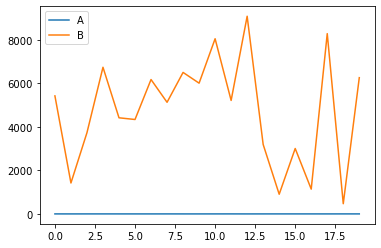

In [102]:
df.plot()  # 绘图

### z-score标准化
$$\hat{x} = (x-\mu) / \delta$$

In [103]:
df_z_score = (df - df.mean()) / df.std()  # Z-Score 标准化
df_z_score
# from scipy import stats

# stats.zscore(df)
# (df.values - df.values.mean(axis=0)) / df.values.std(axis=0)  # 将 DataFrame 处理从 NumPy 数组再运算

,A,B
0,0.826146,0.258411
1,-1.611982,-1.334836
2,0.378934,-0.414917
3,0.753003,0.782057
4,-0.060055,-0.142358
5,-0.949169,-0.173474
6,-1.036010,0.557752
7,0.791096,0.141393
8,-1.130057,0.687600
9,-1.392431,0.491184


<AxesSubplot:>

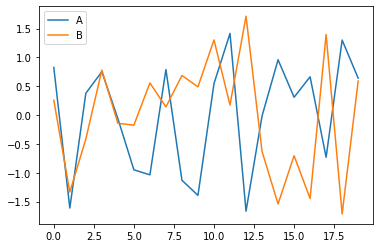

In [104]:
df_z_score.plot()

 Min-Max 标准化 同样是常用手段，其效果类似于区间缩放，可以将数值缩放到 0-1 之间。其公式为：

$$\hat x=\frac{x-x_{min}}{x_{max}-x_{min}}$$

​	
 
其中，$x_{max}$
​	
  为样本数据的最大值，$x_{min}$

​	
  为样本数据的最小值，$x_{max}-x_{min}$

​	
  为极差。

接下来，我们使用 Min-Max 标准化对上面的 DataFrame 进行标准化处理并绘图。

In [105]:
df_min_max = (df - df.min()) / (df.max() - df.min())  # Min-Max 标准化
df_min_max

,A,B
0,0.808233,0.575163
1,0.017698,0.110558
2,0.663229,0.378815
3,0.784517,0.727862
4,0.520892,0.458295
5,0.232608,0.449221
6,0.204451,0.662453
7,0.796868,0.541039
8,0.173957,0.700318
9,0.088885,0.643041


<AxesSubplot:>

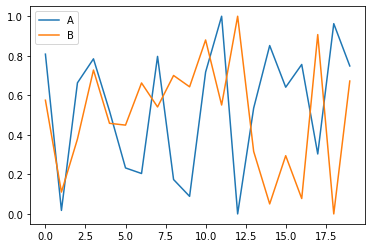

In [106]:
df_min_max.plot()

In [107]:
from sklearn.preprocessing import MinMaxScaler

MinMaxScaler().fit_transform(df)

array([[0.80823251, 0.57516284],
       [0.01769843, 0.1105581 ],
       [0.66322948, 0.37881459],
       [0.7845168 , 0.72786241],
       [0.52089242, 0.45829496],
       [0.23260785, 0.44922138],
       [0.20445058, 0.6624531 ],
       [0.79686805, 0.54103921],
       [0.17395695, 0.70031804],
       [0.08888513, 0.64304147],
       [0.71769454, 0.87998216],
       [1.        , 0.55091317],
       [0.        , 1.        ],
       [0.53530637, 0.31603012],
       [0.85173194, 0.05055167],
       [0.64098263, 0.29452043],
       [0.75602799, 0.0778507 ],
       [0.30325904, 0.90720358],
       [0.96248417, 0.        ],
       [0.74846616, 0.67234013]])

,A,B
0,0.771321,5425.443680
1,0.020752,1421.700476
2,0.633648,3733.407601
3,0.748804,6741.336151
4,0.498507,4418.331744
5,0.224797,4340.139933
6,0.198063,6177.669785
7,0.760531,5131.382426
8,0.169111,6503.971819
9,0.088340,6010.389534


## 独热编码
在对数据的预处理过程中，我们会遇到有一些特征列中的样本并不是连续存在的，而是以分类形式存在的情况。例如，某一装置的状态有三种情况，分别为：正常、机械故障、电路故障。如果我们要将这些数据运用到后续的预测分析中，就需要对文字状态进行转换。一般情况下，可以用 0 表示正常，1 代表机械故障，2 代表电路故障。

但是这种映射方式，往往会让学习器认为 2 代表电路故障比 1 代表机械故障更「大」，从而影响模型分析结果，这肯定是不行的。

所以，对于以分类形式存在的特征变量，我们会采用一种叫  独热编码 One-Hot Encoding 的方式将其转换成二元特征编码，进一步对特征进行了稀疏处理。独热编码采用位状态寄存器来对个状态进行编码，每个状态都由它独立的寄存器位，并且在任意时候只有一位有效。

---

|自然状态码|独热编码|
| ------| ------ |
|000|000001|
|001|000010|
|010|000100|
|011|001000|
|100|010000|
|101|100000|

In [108]:
df = pd.DataFrame({'fruits': ['apple', 'banana', 'pineapple']*2})  # 示例装置状态表
df

,fruits
0,apple
1,banana
2,pineapple
3,apple
4,banana
5,pineapple


In [109]:
pd.get_dummies(df)

,fruits_apple,fruits_banana,fruits_pineapple
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0
4,0,1,0
5,0,0,1


## 数据离散化
数据离散化一般特指将连续数据离散化，例如我们统计了一个包含「年龄」的数据集，这些年龄都是以数值型数据呈现，可以被看作是连续数据。如果，我们按照年龄段对数据进行分割，1-10 岁为少儿，11-20 岁为少年，21-30 岁为青年等，这就可以被看作是数据离散化的过程
数据离散化有时候是为了算法实施需要，也有可能离散数据更适合数据的信息表达。当我们对连续数据进行按区间离散化时，你可以通过编写代码实现。不过，这里介绍 Pandas 中一个非常方便的区间离散化方法 pd.cut。

例如，我们将数组 [1, 2, 7, 8, 5, 4, 12, 6, 3] 等间距分割为 3 部分：

In [110]:
pd.cut(np.array([1, 2, 7, 8, 5, 4, 12, 6, 3]), bins=3)  # bins 指定划分数量

[(0.989, 4.667], (0.989, 4.667], (4.667, 8.333], (4.667, 8.333], (4.667, 8.333], (0.989, 4.667], (8.333, 12.0], (4.667, 8.333], (0.989, 4.667]]
Categories (3, interval[float64]): [(0.989, 4.667] < (4.667, 8.333] < (8.333, 12.0]]

In [111]:
pd.cut(np.array([1, 2, 7, 8, 5, 4, 12, 6, 3]), 
       bins=[0, 5, 10, 15], labels=["small", "medium", "large"])

['small', 'small', 'medium', 'medium', 'small', 'small', 'large', 'medium', 'small']
Categories (3, object): ['small' < 'medium' < 'large']

## 数据规约
本次实验中，我们将了解数据预处理中的第四项流程：数据规约。数据规约的思想很简单，那就是尝试通过对数据「压缩」来得到比利用全部数据解决甚至更好的效果。数据规约也是特征工程的一部分，常涉及到主成分分析、线性判别分析、相关系数等内容。
### 主成分分析
 主成分分析 是多元线性统计里面的概念，它的英文是 Principal Components Analysis，简称 PCA。主成分分析旨在降低数据的维数，通过保留数据集中的主要成分来简化数据集。简化数据集在很多时候是非常必要的，因为复杂往往就意味着计算资源的大量消耗。通过对数据进行降维，我们就能在不较大影响结果的同时，减少模型学习时间。

主成分分析的数学基原理非常简单，通过对协方差矩阵进行特征分解，从而得出主成分（特征向量）与对应的权值（特征值）。然后剔除那些较小特征值（较小权值）对应的特征，从而达到降低数据维数的目的。

In [112]:
import pandas as pd
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
%matplotlib inline

iris = load_iris()  # 加载原始数据
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)  # 处理为 DataFrame
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [113]:
from sklearn.decomposition import PCA

iris_pca = PCA(n_components=2).fit_transform(iris_df)  # PCA 降 2 维
iris_pca = pd.DataFrame(iris_pca, columns=['pca_x', 'pca_y'])  # 整理 DataFrame
iris_pca

,pca_x,pca_y
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

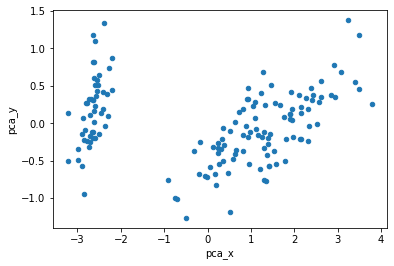

In [114]:
iris_pca.plot.scatter(x='pca_x', y='pca_y')  # 绘制数据点

<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

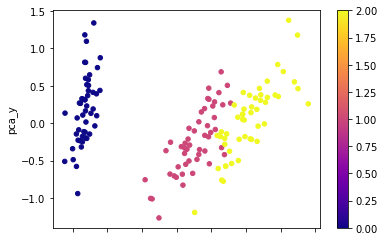

In [115]:
iris_pca.plot.scatter(x='pca_x', y='pca_y',
                      c=iris.target, cmap='plasma')  # 数据点着色
#当然，我们上面是按照方便可视化的角度来讲解主成分分析。实际上，当我们的模型无需大量的特征输入时（大量特征也无助于改善模型性能时），通过 PCA 压缩特征的数量可以从某种意义上改善模型的运行速度，所以 PCA 被当作一种数据规约手段。
# 可以看到，该数据集包含有 4 列，这代表鸢尾花的 4 个特征。

# 此时，如果你想将上面的数据集绘制成数据点图（平面散点图），你知道是无法实现的。因为，散点图只能存在横纵坐标值，这里有 4 个特征。那么，此时就可以使用 PCA 对数据进行降维处理，由 4 个特征变为 2 个新特征之后，即可绘图。

# 这里介绍以下  sklearn.decomposition.PCA 方法中的几个参数：

# n_components= 表示需要保留主成分（特征）的数量。
# copy= 表示针对原始数据降维还是针对原始数据副本降维。当参数为 False 时，降维后的原始数据会发生改变，这里默认为 True。
# whiten= 白化表示将特征之间的相关性降低，并使得每个特征具有相同的方差。
# svd_solver= 表示奇异值分解 SVD 的方法。有 4 参数，分别是：auto, full, arpack, randomized。
# PCA 类在实现时模仿了 scikit-learn 中的模型训练过程，故此需要使用 fit 方法完成降维过程，这里直接使用 fit_transform 返回降维结果。

In [116]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris_lda = LinearDiscriminantAnalysis(
    n_components=2).fit_transform(iris_df, iris.target)  # lda 降 2 维

iris_lda = pd.DataFrame(iris_lda, columns=['lda_x', 'lda_y'])  # 整理 DataFrame
iris_lda

,lda_x,lda_y
0,8.061800,0.300421
1,7.128688,-0.786660
2,7.489828,-0.265384
3,6.813201,-0.670631
4,8.132309,0.514463
...,...,...
145,-5.645003,1.677717
146,-5.179565,-0.363475
147,-4.967741,0.821141
148,-5.886145,2.345091


<AxesSubplot:xlabel='pca_x', ylabel='pca_y'>

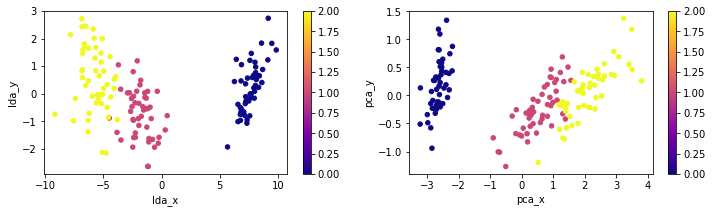

In [117]:
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(12, 3))
iris_lda.plot.scatter(x='lda_x', y='lda_y', c=iris.target,
                      cmap='plasma', ax=axes[0])  # 数据点着色
iris_pca.plot.scatter(x='pca_x', y='pca_y', c=iris.target,
                      cmap='plasma', ax=axes[1])  # 数据点着色